In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re
from pathlib import Path
from visualizefricsensitivityfun import visualize_fric_sensitivity

In [2]:
Cycle_name = 'CAES' 

In [3]:
notebook_dir = Path().resolve()
main_dir     = notebook_dir.parent

In [4]:
pattern = rf"^{Cycle_name}fric(\d+)$"
regex   = re.compile(pattern)

In [5]:
fric_list = []
for d in main_dir.iterdir():
    if d.is_dir():
        m = regex.match(d.name)
        if m:
            fric_list.append((int(m.group(1)), d))
fric_folders = [folder for _, folder in sorted(fric_list, key=lambda x: x[0])]
rows = []
for folder in fric_folders:
    ex = int(regex.match(folder.name).group(1))
    data_dir = folder / f"{folder.name}_data"
    kpi_files = list(data_dir.glob(f"{folder.name}_dfKPI.*"))
    if not kpi_files:
        raise FileNotFoundError(f"No dfKPI in {data_dir}")
    df_kpi = pd.read_excel(kpi_files[0])
    df_row = df_kpi.set_index('Metric')['Value'].to_frame().T
    df_row.insert(0, 'Friction Gradient', ex * 0.0001)
    df_row.insert(0, 'Exercise', ex)
    rows.append(df_row)
dffricsensitivityCAES = pd.concat(rows, ignore_index=True)
dffricsensitivityCAES.sort_values('Exercise', inplace=True)
dffricsensitivityCAES.reset_index(drop=True, inplace=True)

In [6]:
result_dir  = main_dir / f"{Cycle_name}fricsensitivity"
data_dir    = result_dir / f"{Cycle_name}fricsensitivity_data"
figures_dir = result_dir / f"{Cycle_name}fricsensitivity_figures"
for d in (data_dir, figures_dir):
    d.mkdir(parents=True, exist_ok=True)

In [7]:
out_xlsx = data_dir / f"dffricsensitivity{Cycle_name}.xlsx"
dffricsensitivityCAES.to_excel(out_xlsx, index=False)
print(f"✔ Saved sensitivity table to {out_xlsx}")

✔ Saved sensitivity table to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_data\dffricsensitivityCAES.xlsx


In [8]:
fig_dir = figures_dir

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES RTE Under Frictional Losses.png


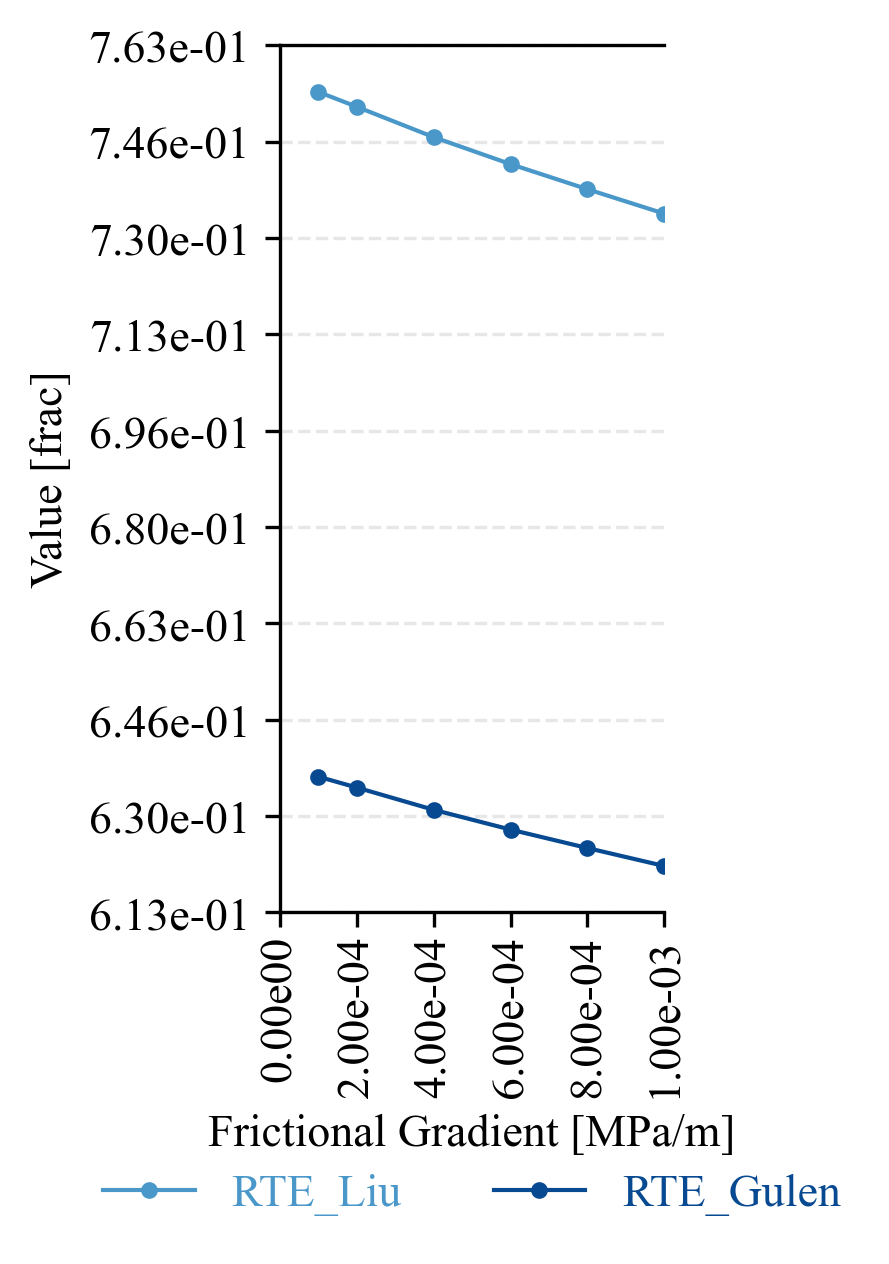

In [9]:
Figure_title = f'{Cycle_name} RTE Under Frictional Losses'
fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title = Figure_title,
    series_left=['RTE_Liu', 'RTE_Gulen'],
    left_label='Value',
    left_units='[frac]'
)
fig.tight_layout(); fig.savefig(fig_dir / f"{Figure_title}.png", dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {fig_dir / f'{Figure_title}.png'}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES PEE Under Frictional Losses.png


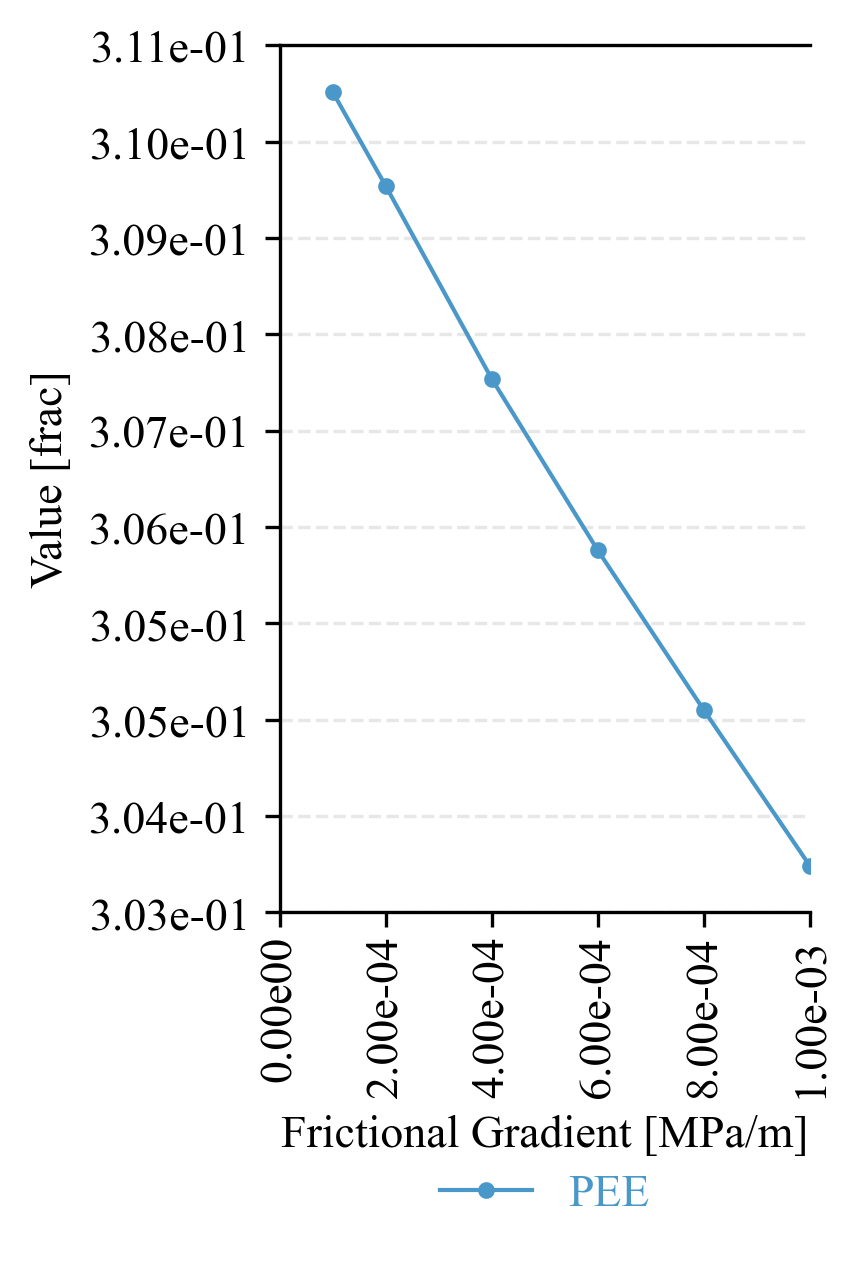

In [10]:
Figure_title = f'{Cycle_name} PEE Under Frictional Losses'
fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title = Figure_title,
    series_left=['PEE'],
    left_label='Value',
    left_units='[frac]'
)
fig.tight_layout(); fig.savefig(fig_dir / f"{Figure_title}.png", dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {fig_dir / f'{Figure_title}.png'}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Energetic Rates Under Frictional Losses.png


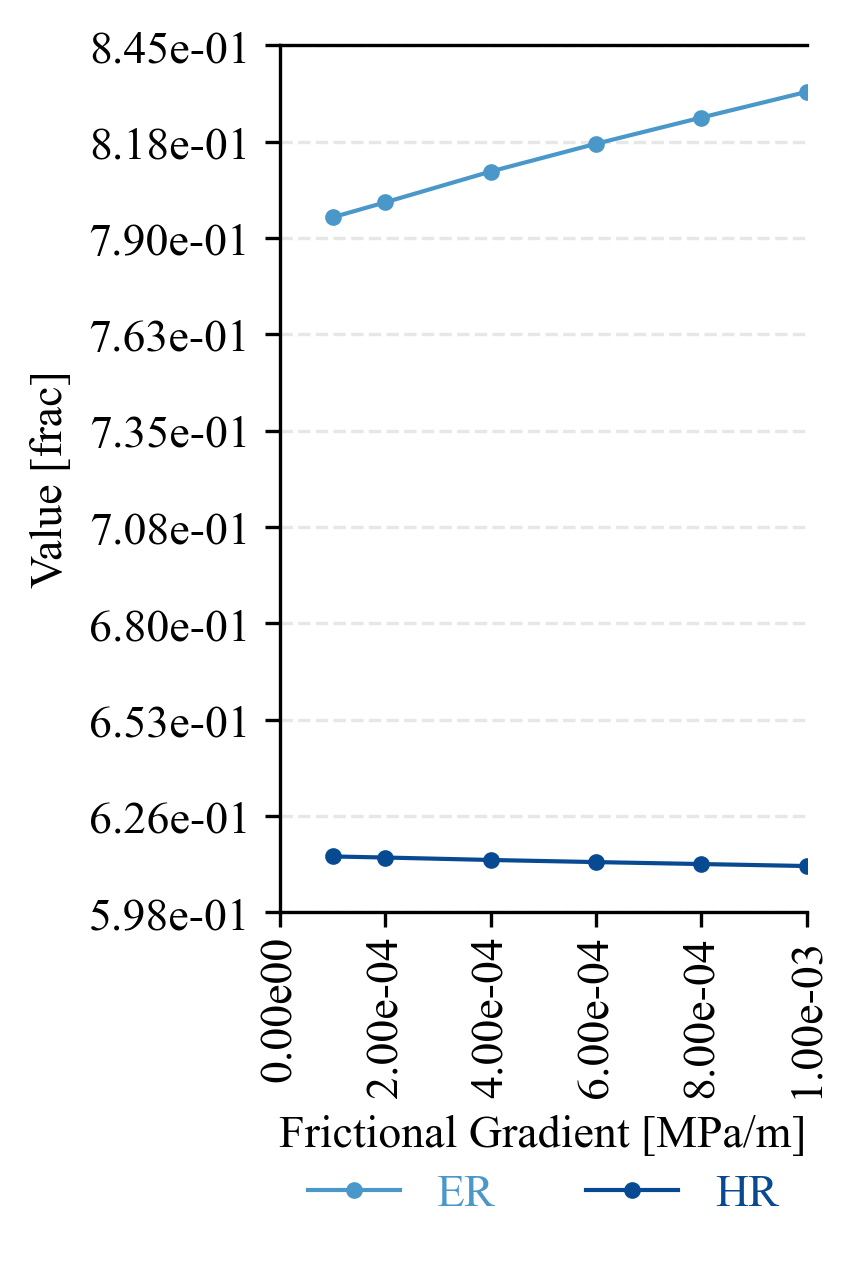

In [11]:
Figure_title = f'{Cycle_name} Energetic Rates Under Frictional Losses'
fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title = Figure_title,
    series_left=['ER', 'HR'],
    left_label='Value',
    left_units='[frac]'
)
fig.tight_layout(); fig.savefig(fig_dir / f"{Figure_title}.png", dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {fig_dir / f'{Figure_title}.png'}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Compression Work Under Frictional Losses.png


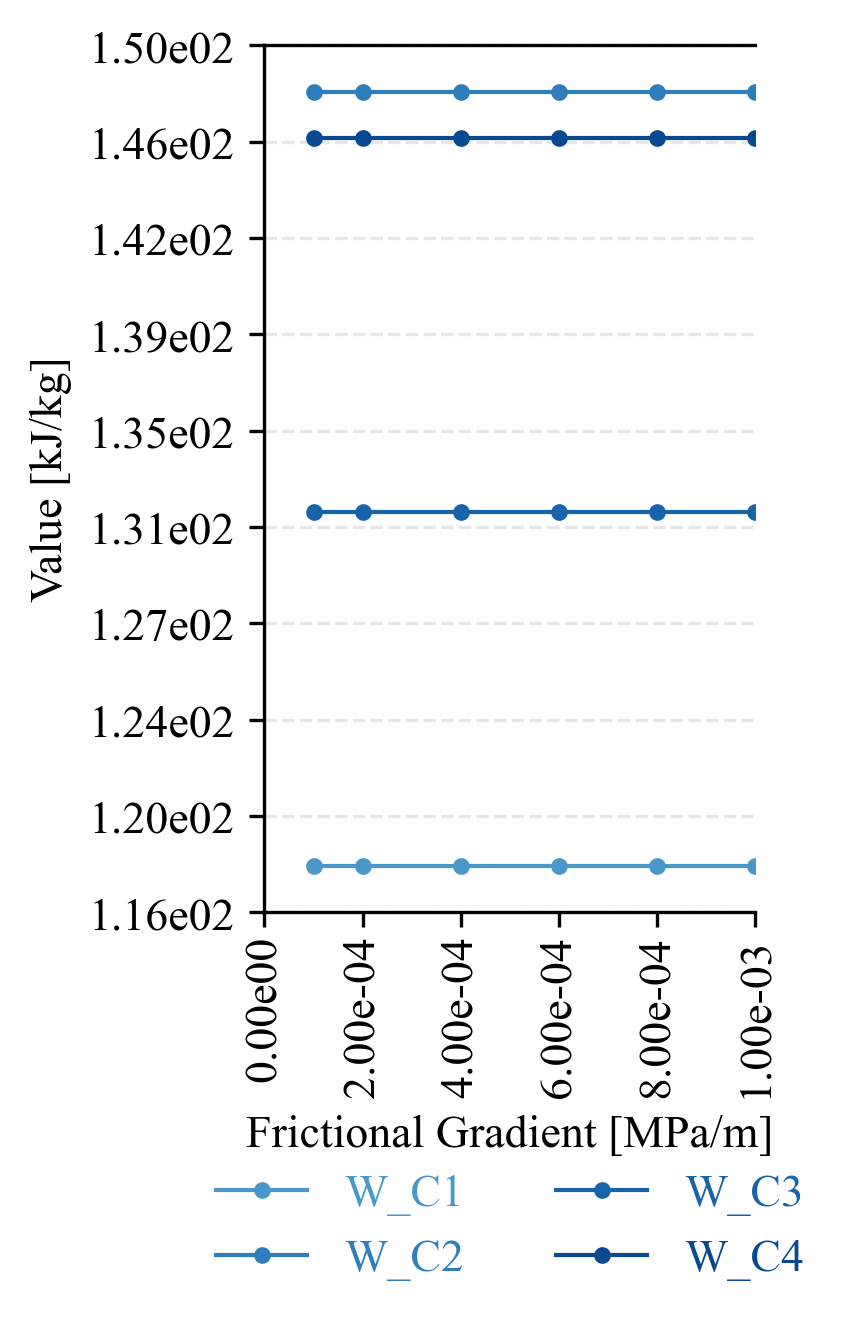

In [12]:
Figure_title = f'{Cycle_name} Compression Work Under Frictional Losses'
fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title = Figure_title,
    series_left=['W_C1', 'W_C2', 'W_C3', 'W_C4'],
    left_label='Value',
    left_units='[kJ/kg]'
)
fig.tight_layout(); fig.savefig(fig_dir / f"{Figure_title}.png", dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {fig_dir / f'{Figure_title}.png'}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Turbine Work Under Frictional Losses.png


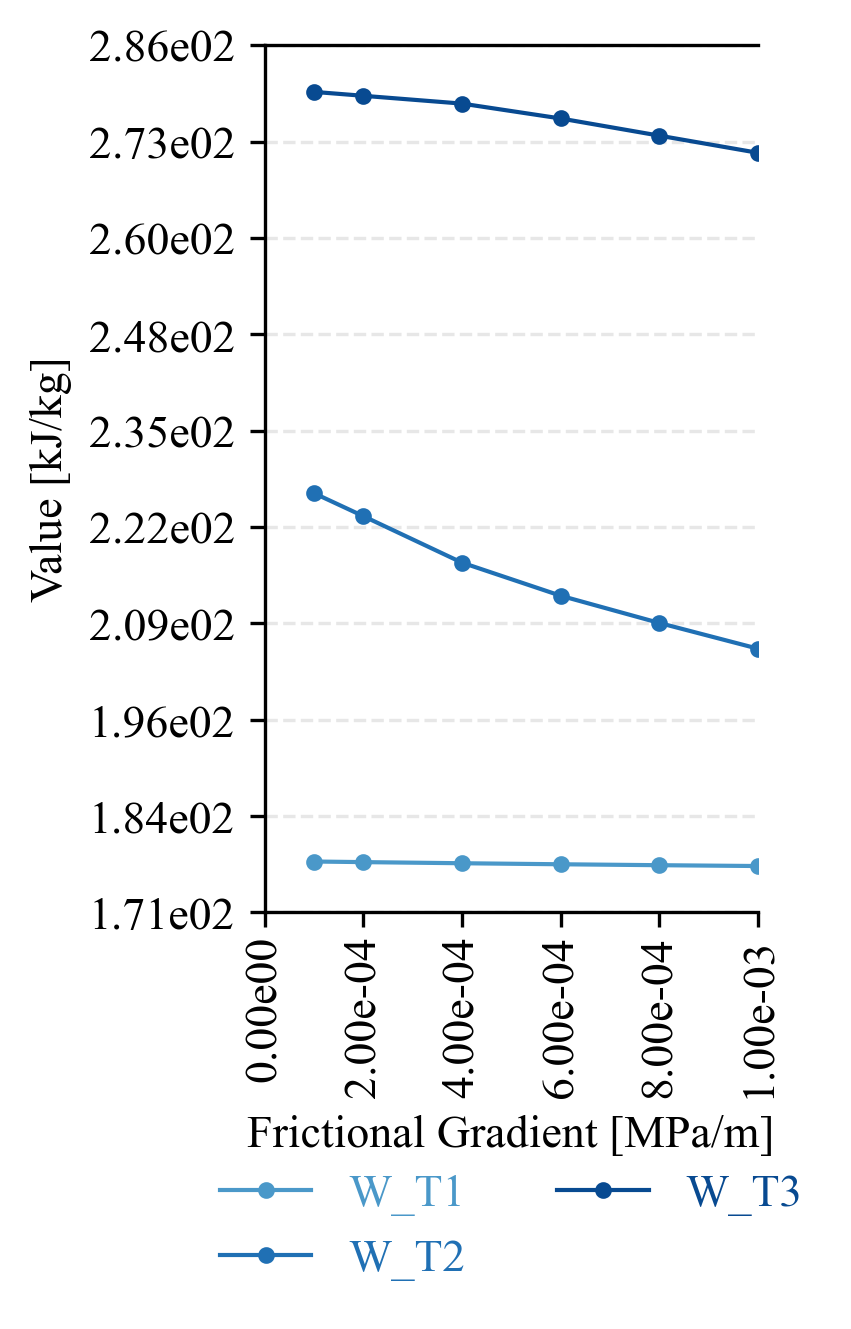

In [13]:
Figure_title = f'{Cycle_name} Turbine Work Under Frictional Losses'
fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title = Figure_title,
    series_left=['W_T1', 'W_T2', 'W_T3'],
    left_label='Value',
    left_units='[kJ/kg]'
)
fig.tight_layout(); fig.savefig(fig_dir / f"{Figure_title}.png", dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {fig_dir / f'{Figure_title}.png'}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Reheating Duty Under Frictional Losses.png


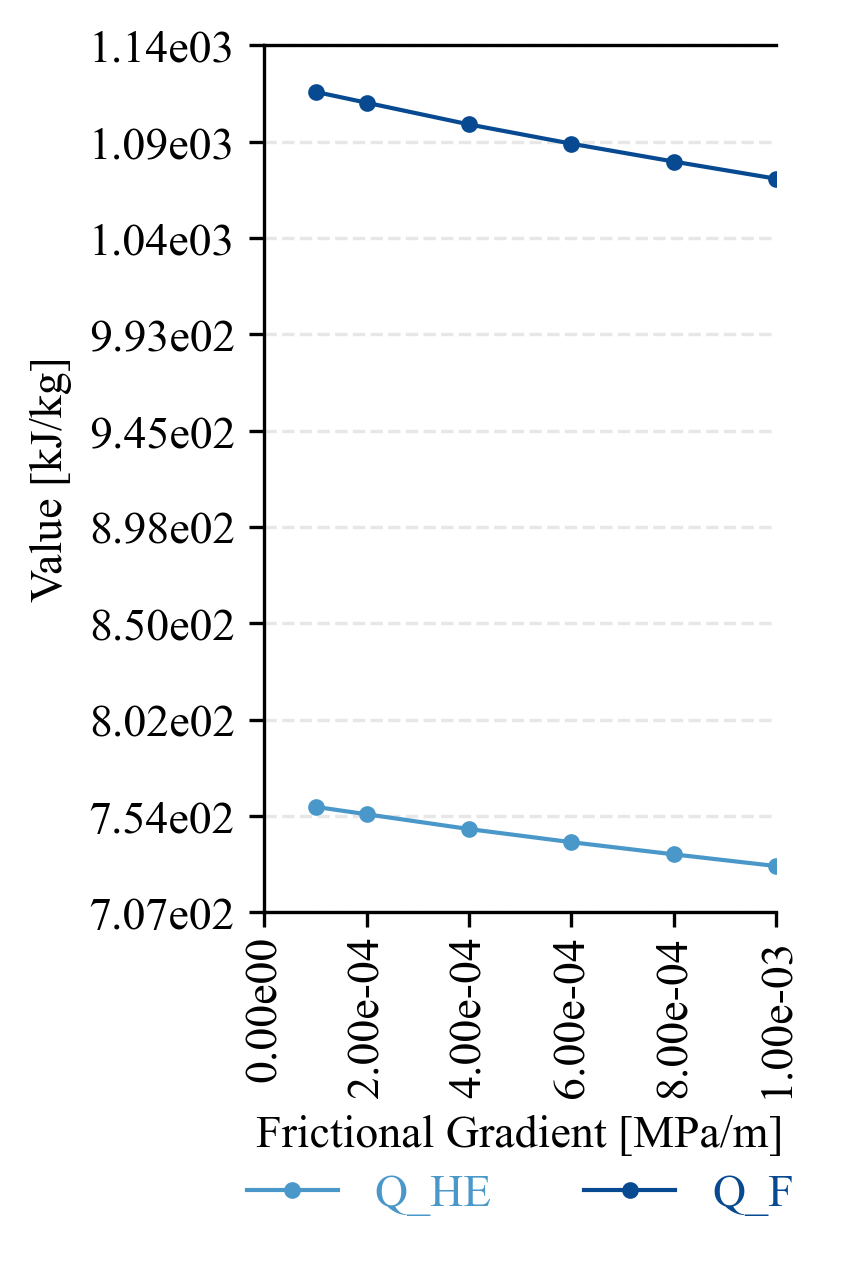

In [14]:
Figure_title = f'{Cycle_name} Reheating Duty Under Frictional Losses'
fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title = Figure_title,
    series_left=['Q_HE', 'Q_F'],
    left_label='Value',
    left_units='[kJ/kg]'
)
fig.tight_layout(); fig.savefig(fig_dir / f"{Figure_title}.png", dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {fig_dir / f'{Figure_title}.png'}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Intercooler Heat Dump Under Frictional Losses.png


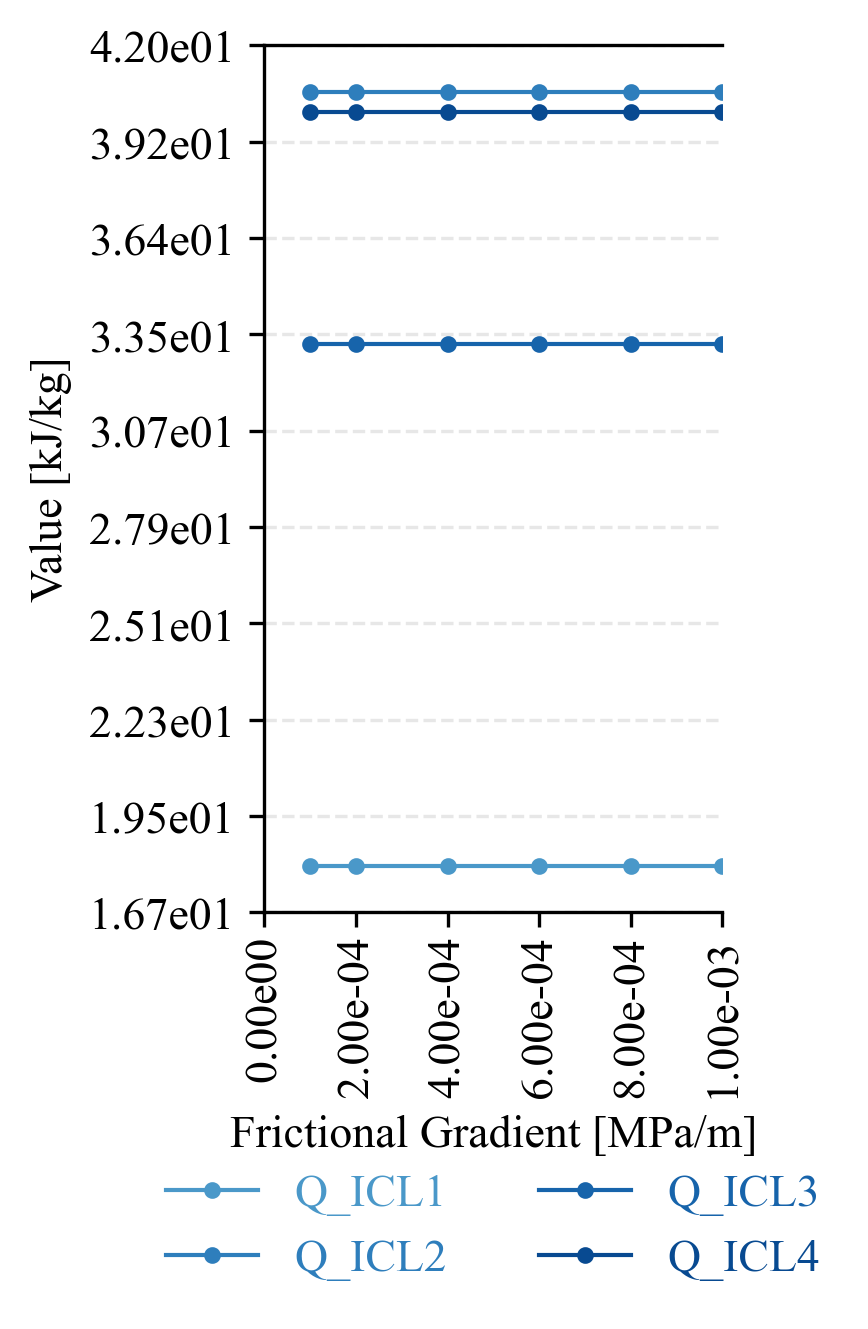

In [15]:
Figure_title = f'{Cycle_name} Intercooler Heat Dump Under Frictional Losses'

dffricsensitivityCAES['Q_ICL4'] = (dffricsensitivityCAES['Q_ICL']- (dffricsensitivityCAES['Q_ICL1']+ dffricsensitivityCAES['Q_ICL2']+ dffricsensitivityCAES['Q_ICL3']))

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['Q_ICL1', 'Q_ICL2', 'Q_ICL3', 'Q_ICL4'],
    left_label='Value',
    left_units='[kJ/kg]'
)

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Exergy Destruction Under Frictional Losses.png


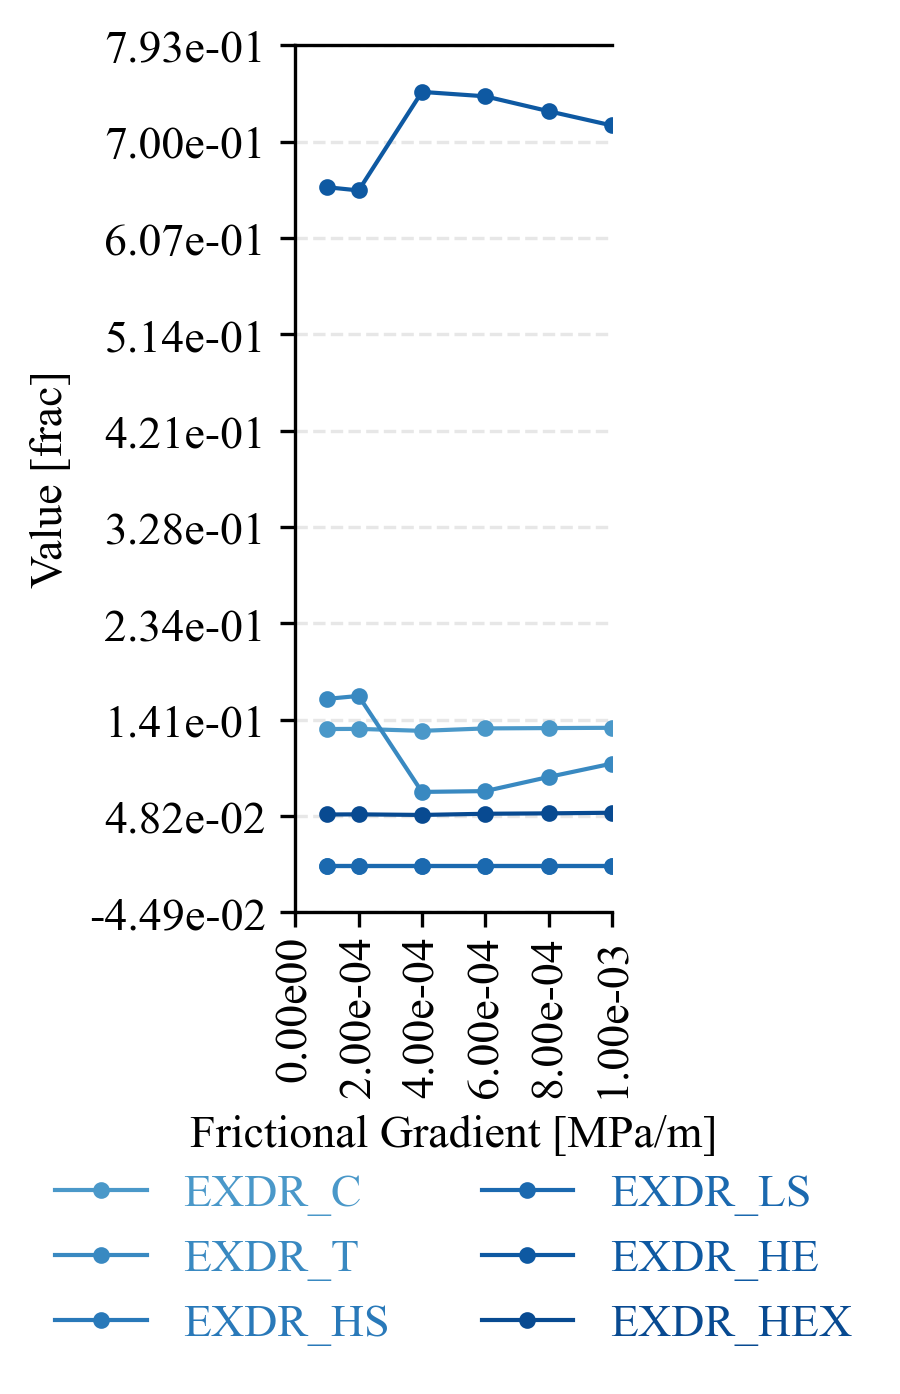

In [16]:
Figure_title = f'{Cycle_name} Exergy Destruction Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['EXDR_C', 'EXDR_T', 'EXDR_HS', 'EXDR_LS', 'EXDR_HE','EXDR_HEX'],
    left_label='Value',
    left_units='[frac]'
)

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Cycle Exergy Analysis Under Frictional Losses.png


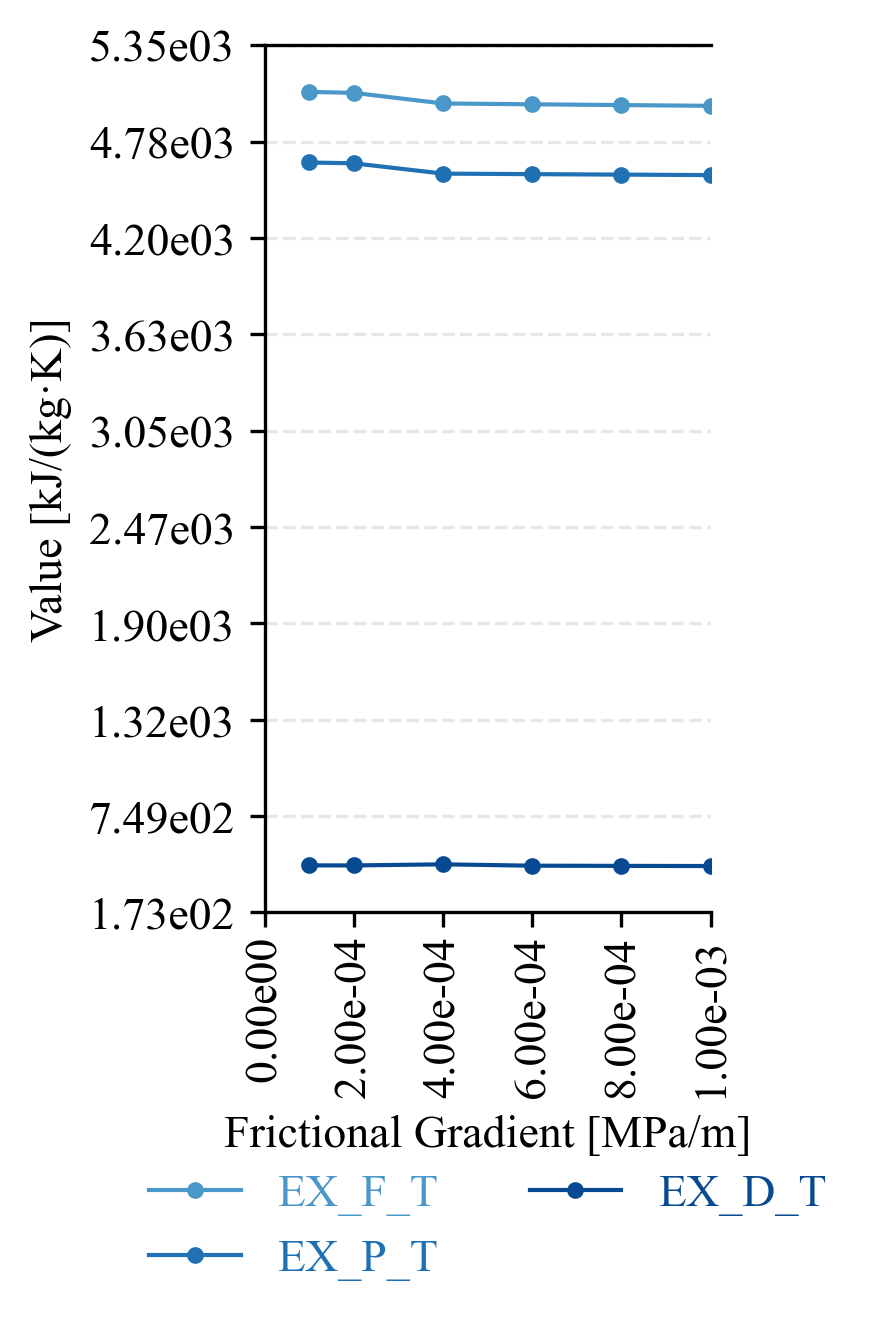

In [17]:
Figure_title = f'{Cycle_name} Cycle Exergy Analysis Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['EX_F_T', 'EX_P_T', 'EX_D_T'],
    left_label='Value',
    left_units='[kJ/(kg⸱K)]',
)

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Exergy Efficiency Under Frictional Losses.png


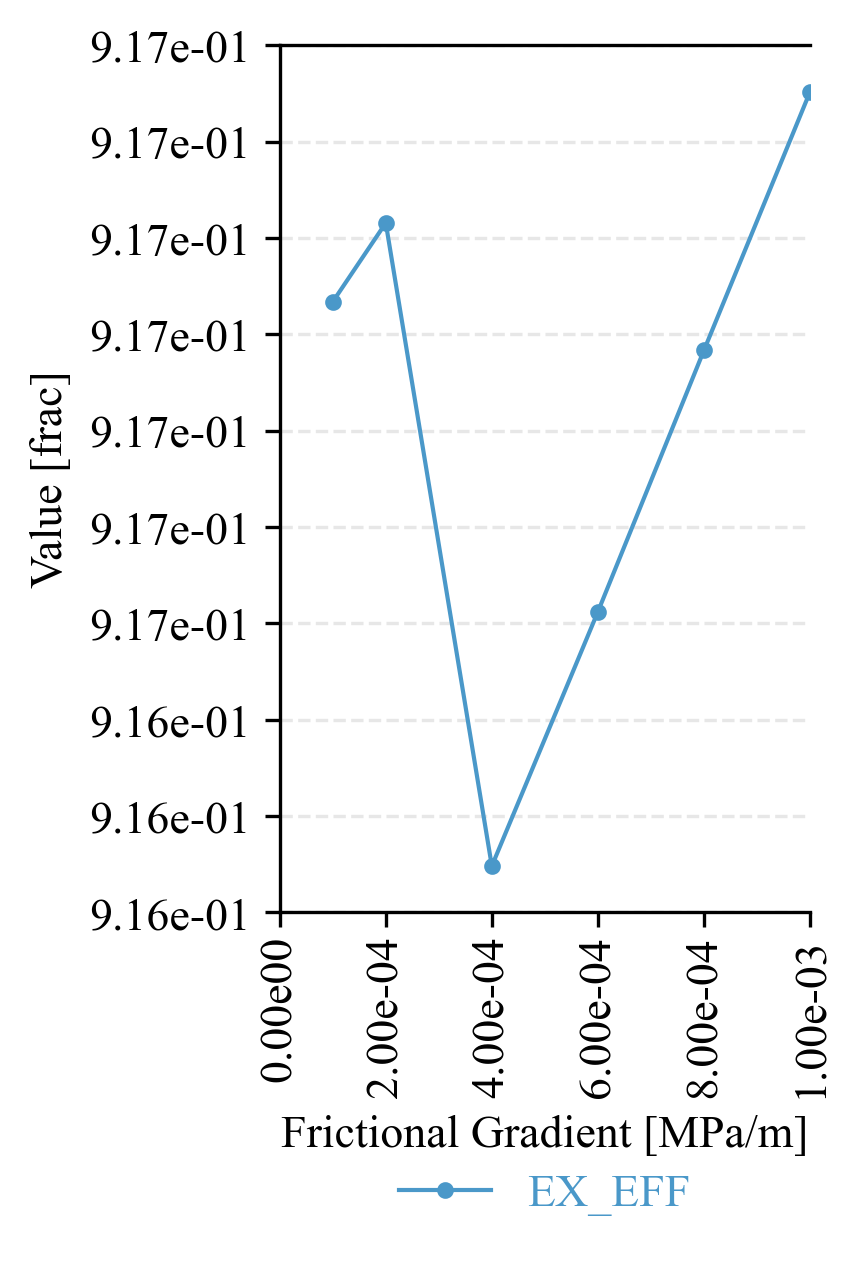

In [18]:
Figure_title = f'{Cycle_name} Exergy Efficiency Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['EX_EFF'],
    left_label='Value',
    left_units='[frac]',
)

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES HS Store Pressure Under Frictional Losses.png


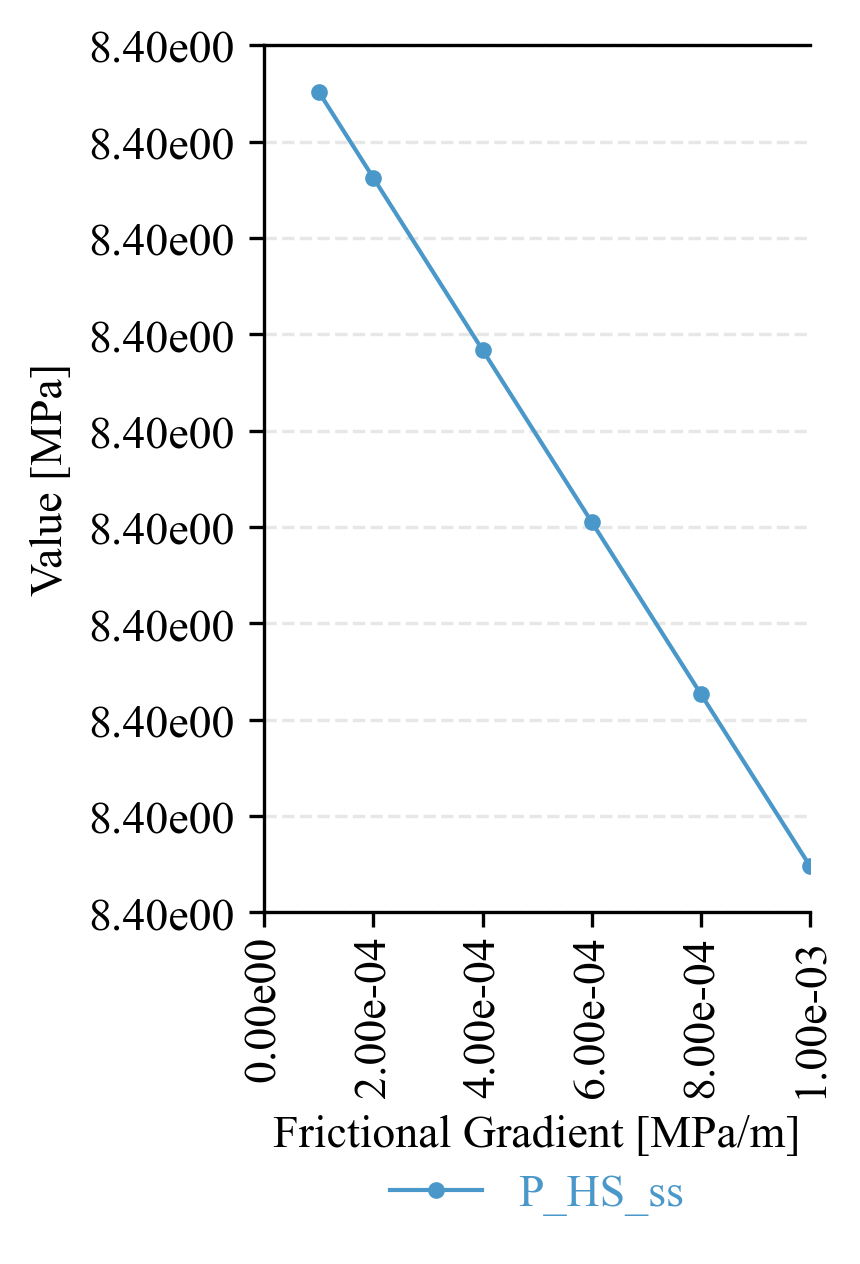

In [19]:
Figure_title = f'{Cycle_name} HS Store Pressure Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['P_HS_ss'],
    left_label='Value',
    left_units='[MPa]',
)

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES HS Store Density Under Frictional Losses.png


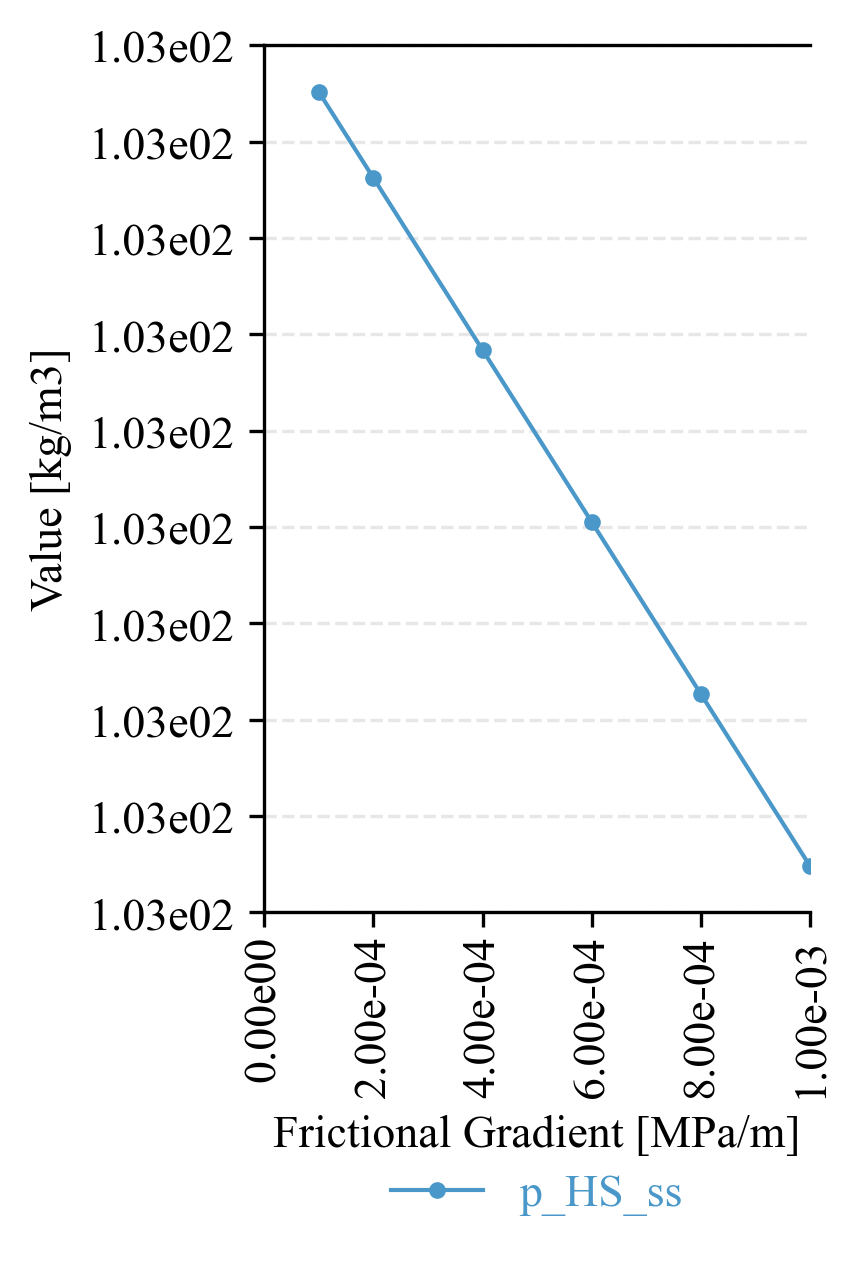

In [20]:
Figure_title = f'{Cycle_name} HS Store Density Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['p_HS_ss'],
    left_label='Value',
    left_units='[kg/m3]',
)

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES HS Store Full-Cycle Pressure Swing Under Frictional Losses.png


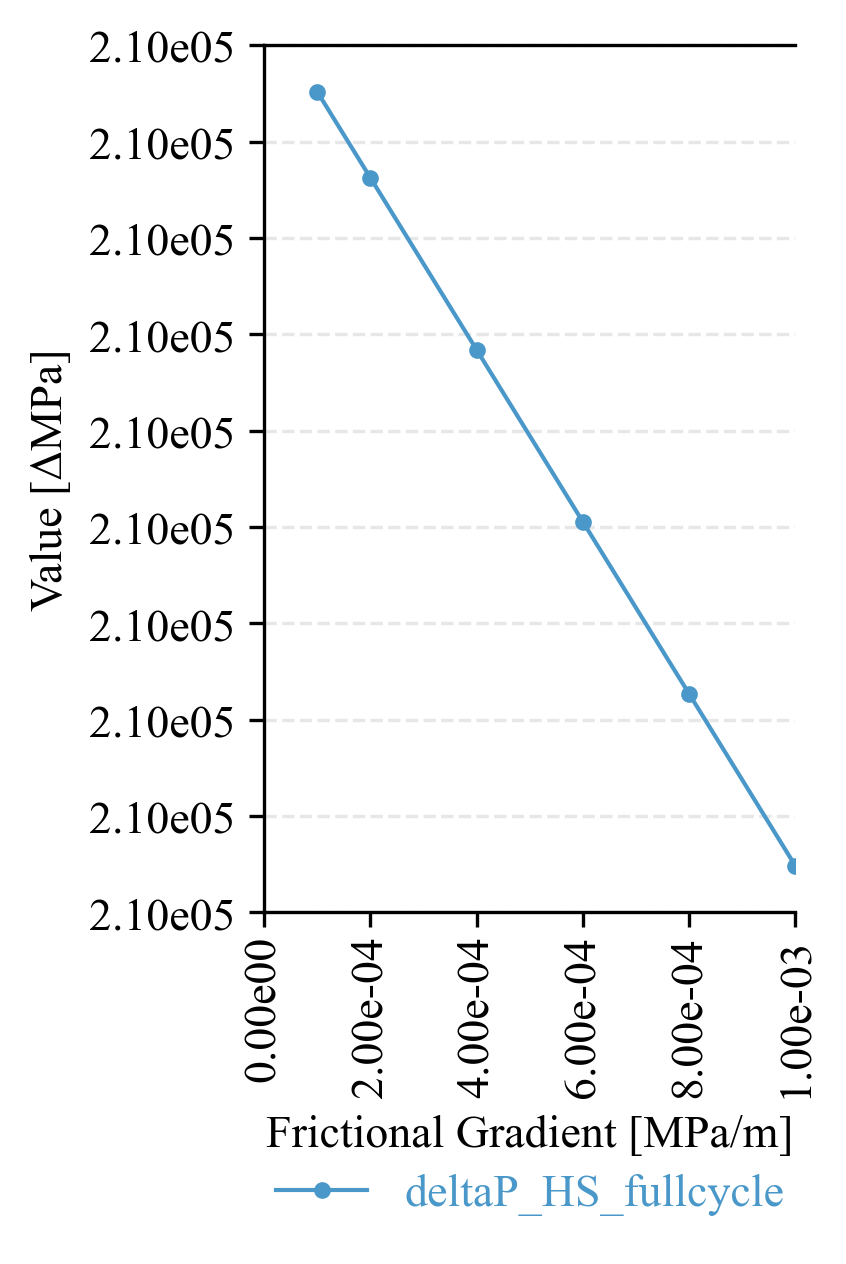

In [21]:
Figure_title = f'{Cycle_name} HS Store Full-Cycle Pressure Swing Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['deltaP_HS_fullcycle'],
    left_label='Value',
    left_units='[ΔMPa]',
)

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES VED under Frictional Losses.png


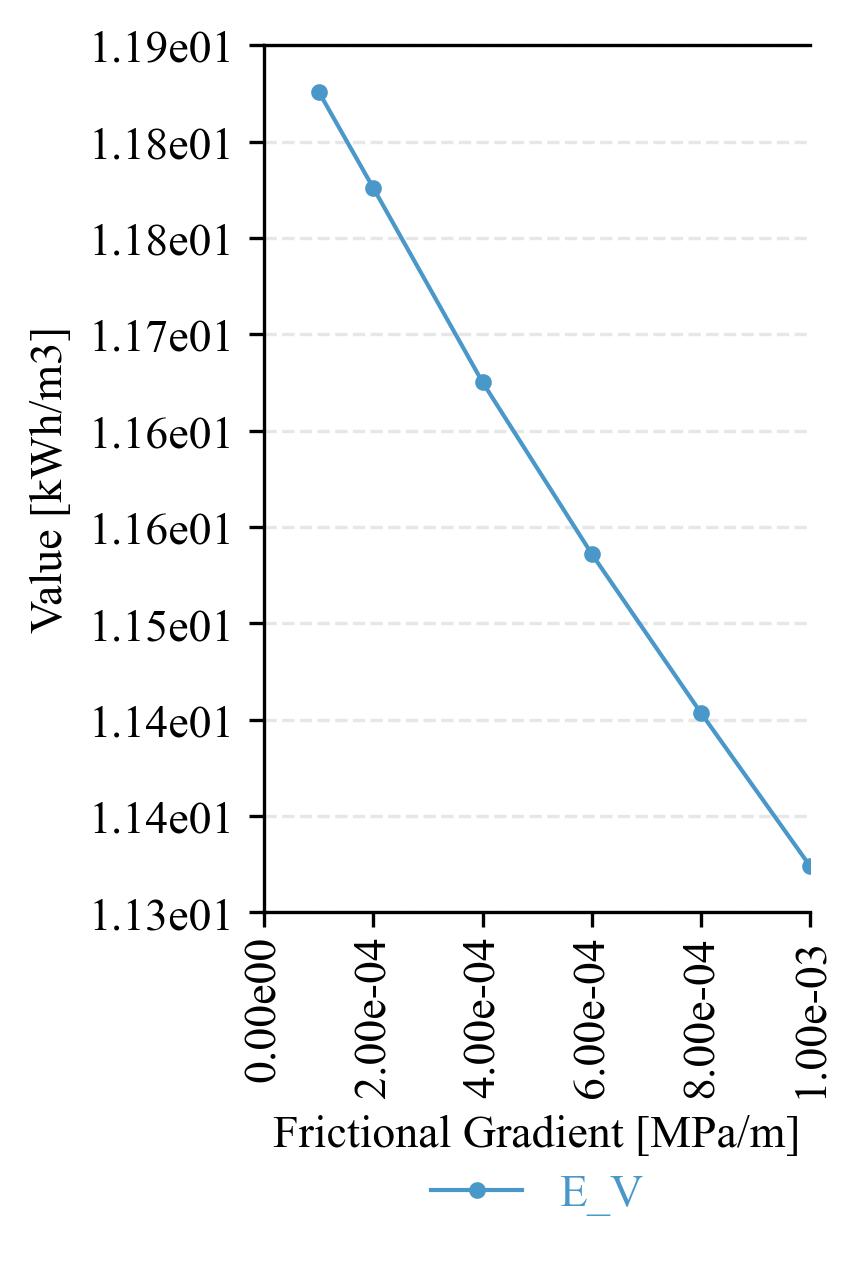

In [22]:
Figure_title = f'{Cycle_name} VED under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['E_V'],
    left_label='Value',
    left_units='[kWh/m3]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Average HS Storage Injection Well Density Under Frictional Losses.png


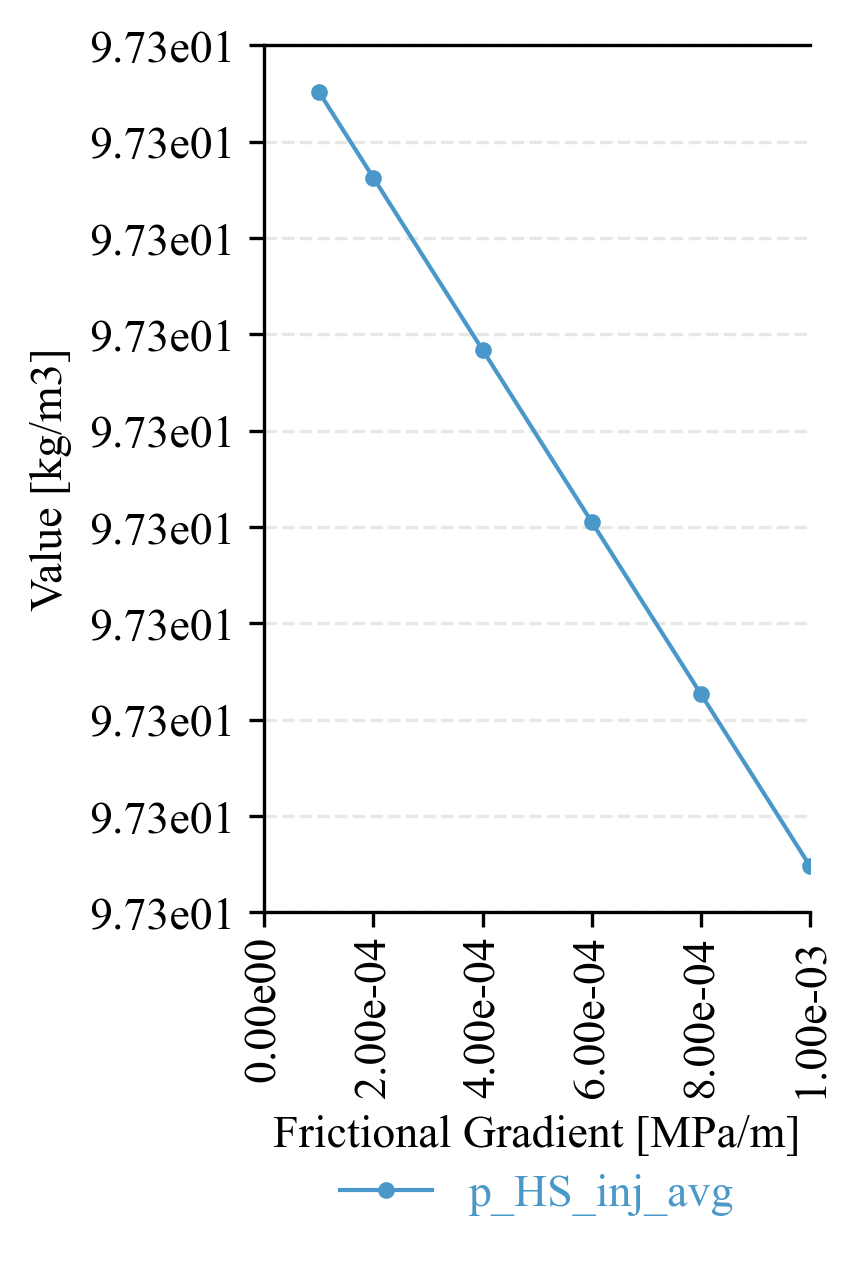

In [23]:
Figure_title = f'{Cycle_name} Average HS Storage Injection Well Density Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['p_HS_inj_avg'],
    left_label='Value',
    left_units='[kg/m3]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Average HS Storage Injection Well Viscosity Under Frictional Losses.png


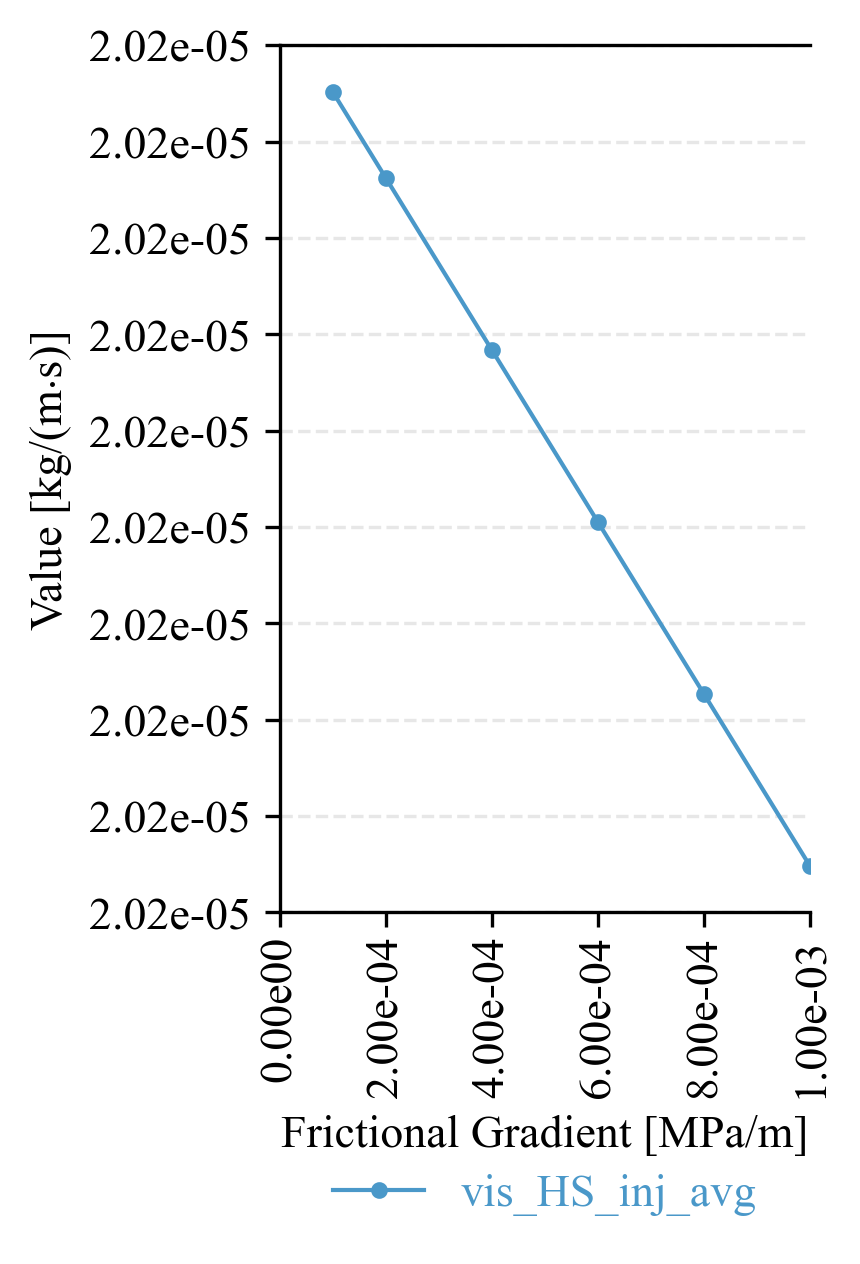

In [24]:
Figure_title = f'{Cycle_name} Average HS Storage Injection Well Viscosity Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['vis_HS_inj_avg'],
    left_label='Value',
    left_units='[kg/(m⸳s)]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES HS Storage Injection Well Pressure Drop.png


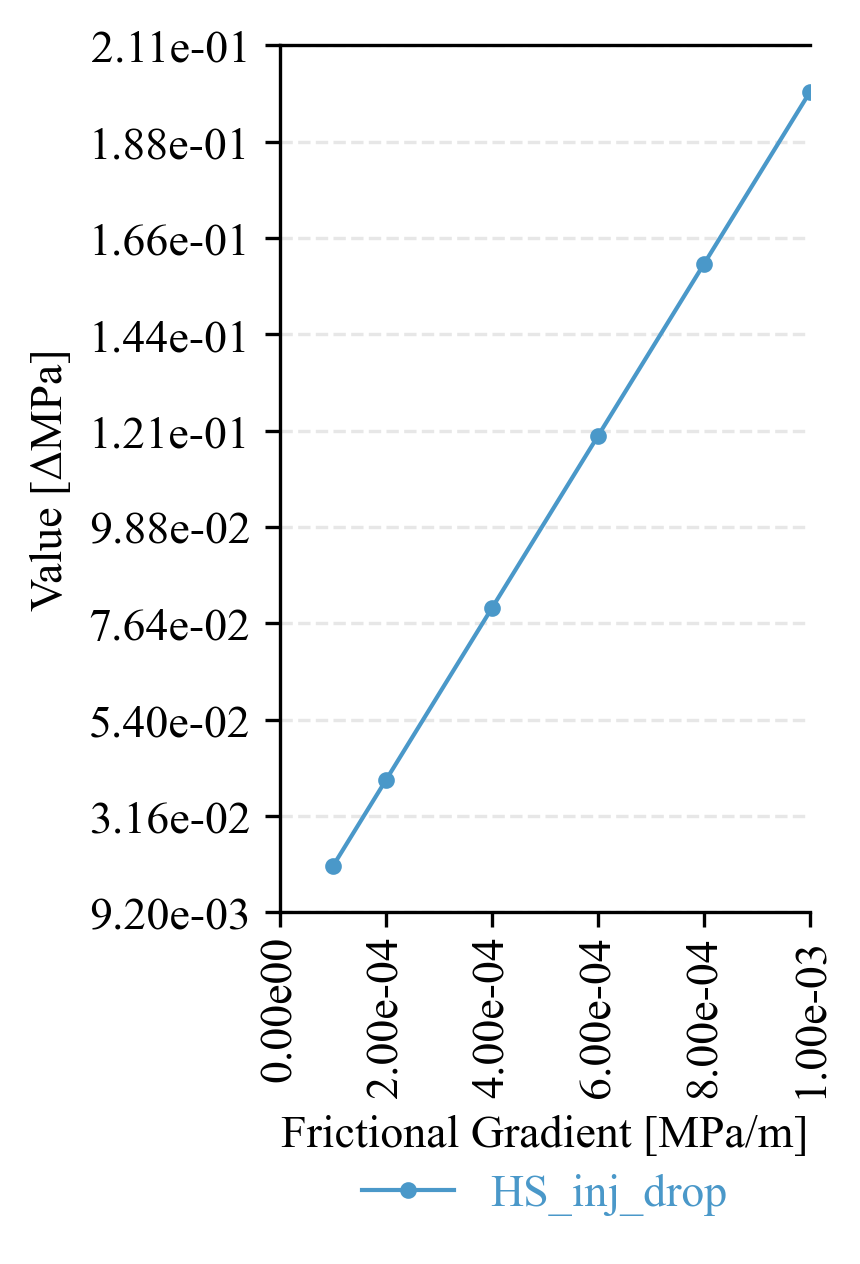

In [25]:
Figure_title = f'{Cycle_name} HS Storage Injection Well Pressure Drop'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['HS_inj_drop'],
    left_label='Value',
    left_units='[ΔMPa]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES HS Storage Injection Basis Well Diameter.png


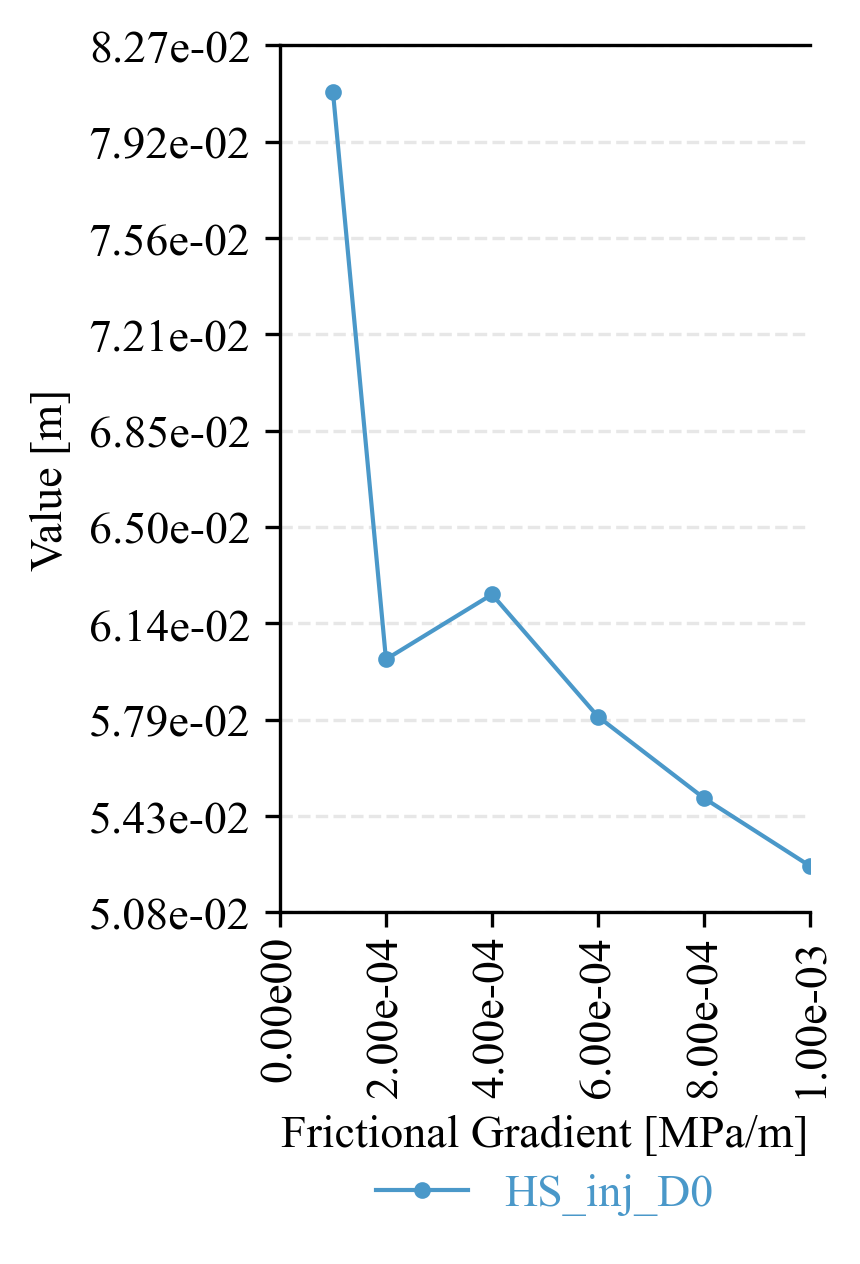

In [26]:
Figure_title = f'{Cycle_name} HS Storage Injection Basis Well Diameter'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['HS_inj_D0'],
    left_label='Value',
    left_units='[m]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Maximum Cashflow Under Frictional Losses.png


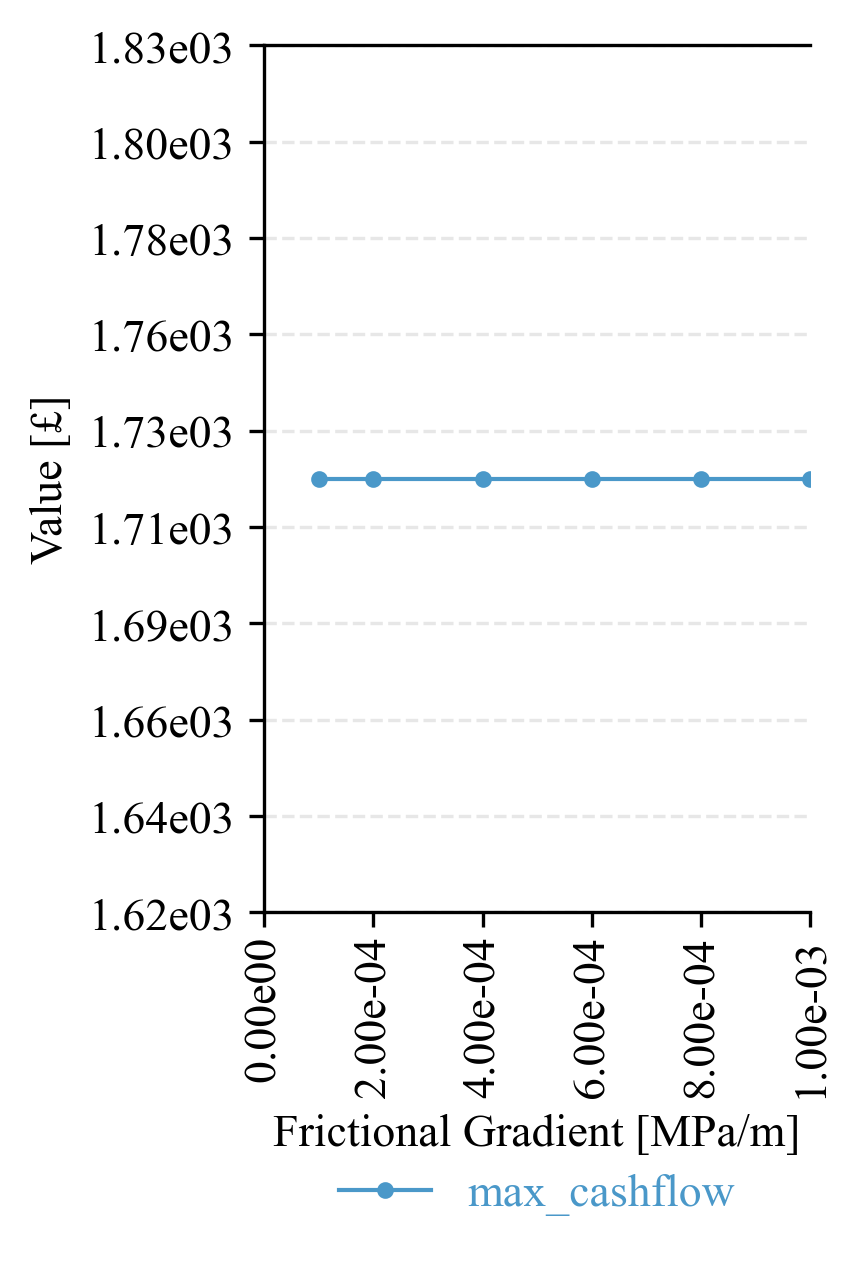

In [27]:
Figure_title = f'{Cycle_name} Maximum Cashflow Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['max_cashflow'],
    left_label='Value',
    left_units='[£]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Maximum Balance Under Frictional Losses.png


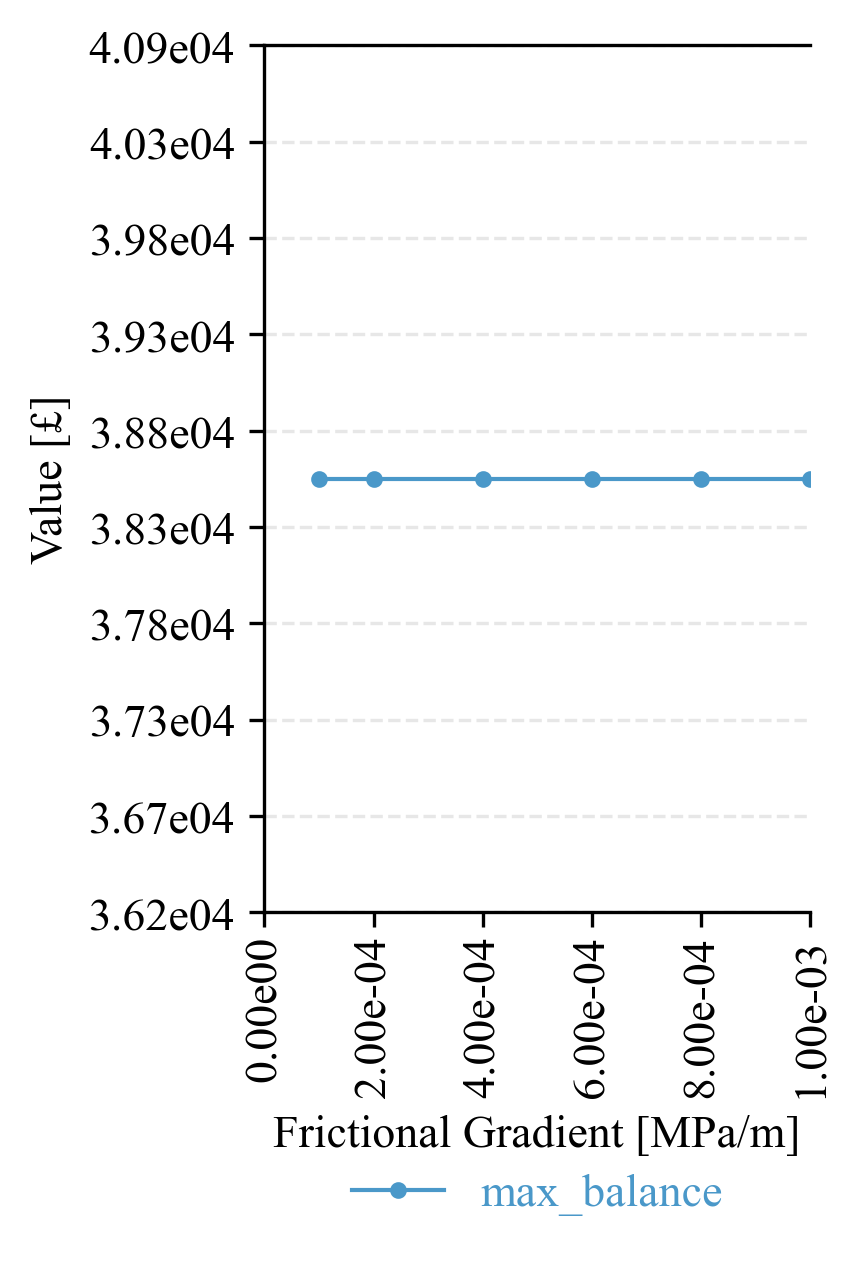

In [28]:
Figure_title = f'{Cycle_name} Maximum Balance Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['max_balance'],
    left_label='Value',
    left_units='[£]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES QSS HS Store Pressure Deviation Under Frictional Losses.png


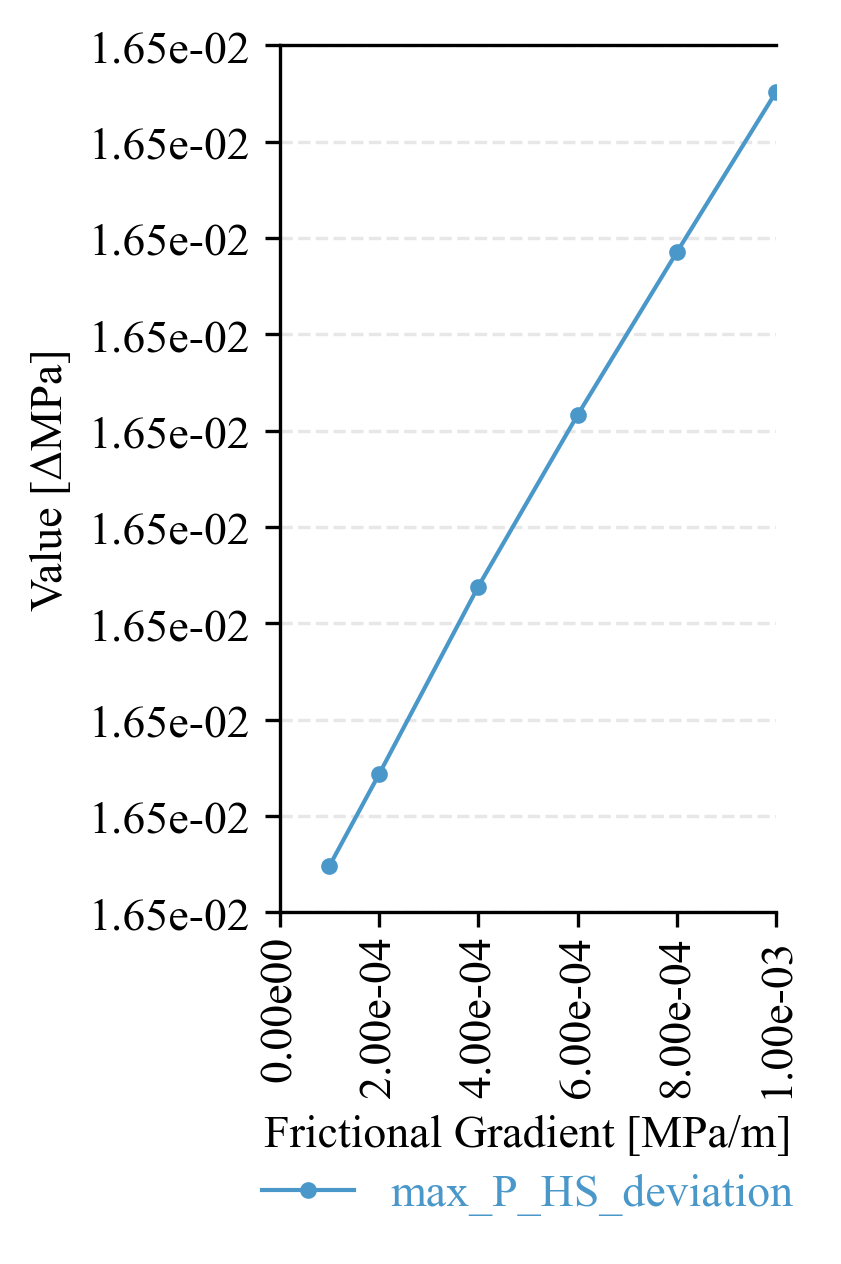

In [29]:
Figure_title = f'{Cycle_name} QSS HS Store Pressure Deviation Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['max_P_HS_deviation'],
    left_label='Value',
    left_units='[ΔMPa]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Maximum Charge Under Frictional Losses.png


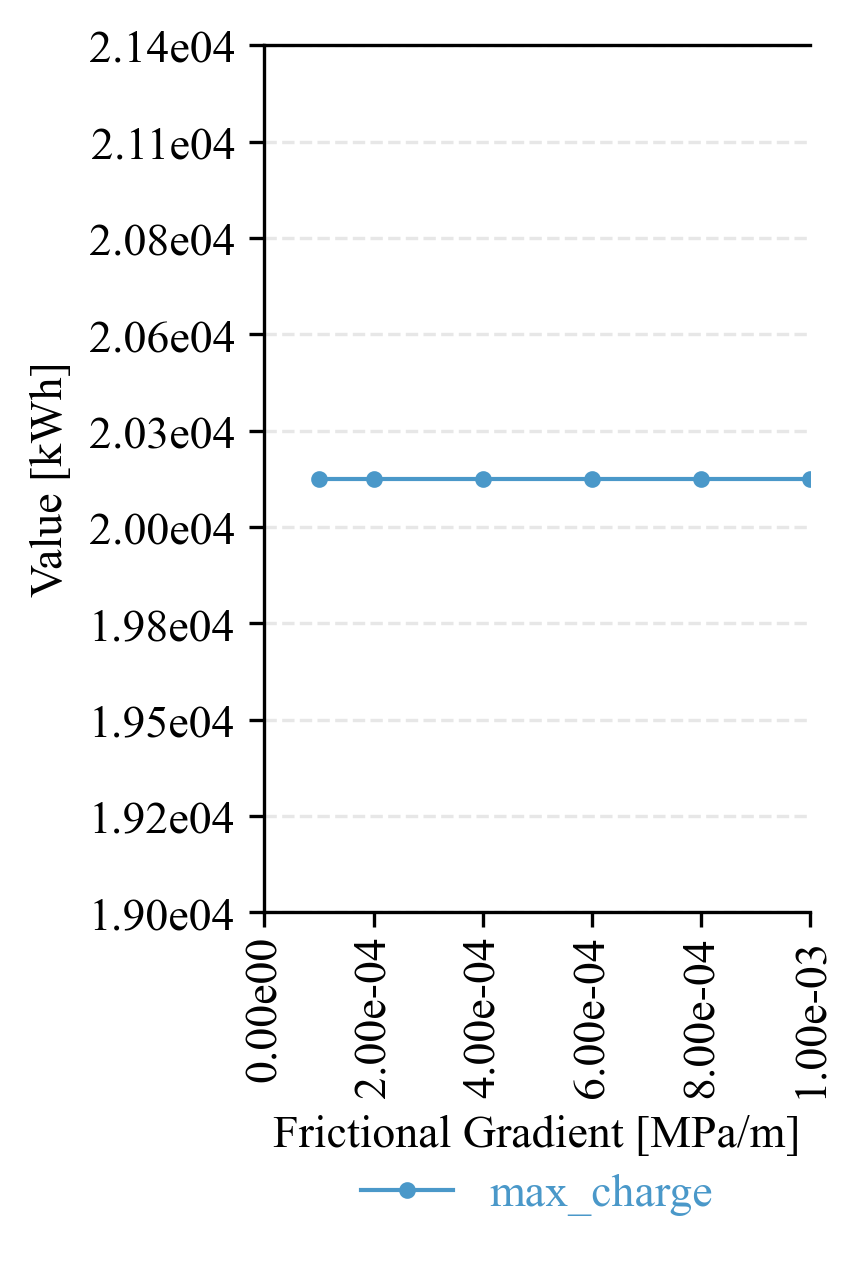

In [30]:
Figure_title = f'{Cycle_name} Maximum Charge Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['max_charge'],
    left_label='Value',
    left_units='[kWh]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Maximum Discharge Under Frictional Losses.png


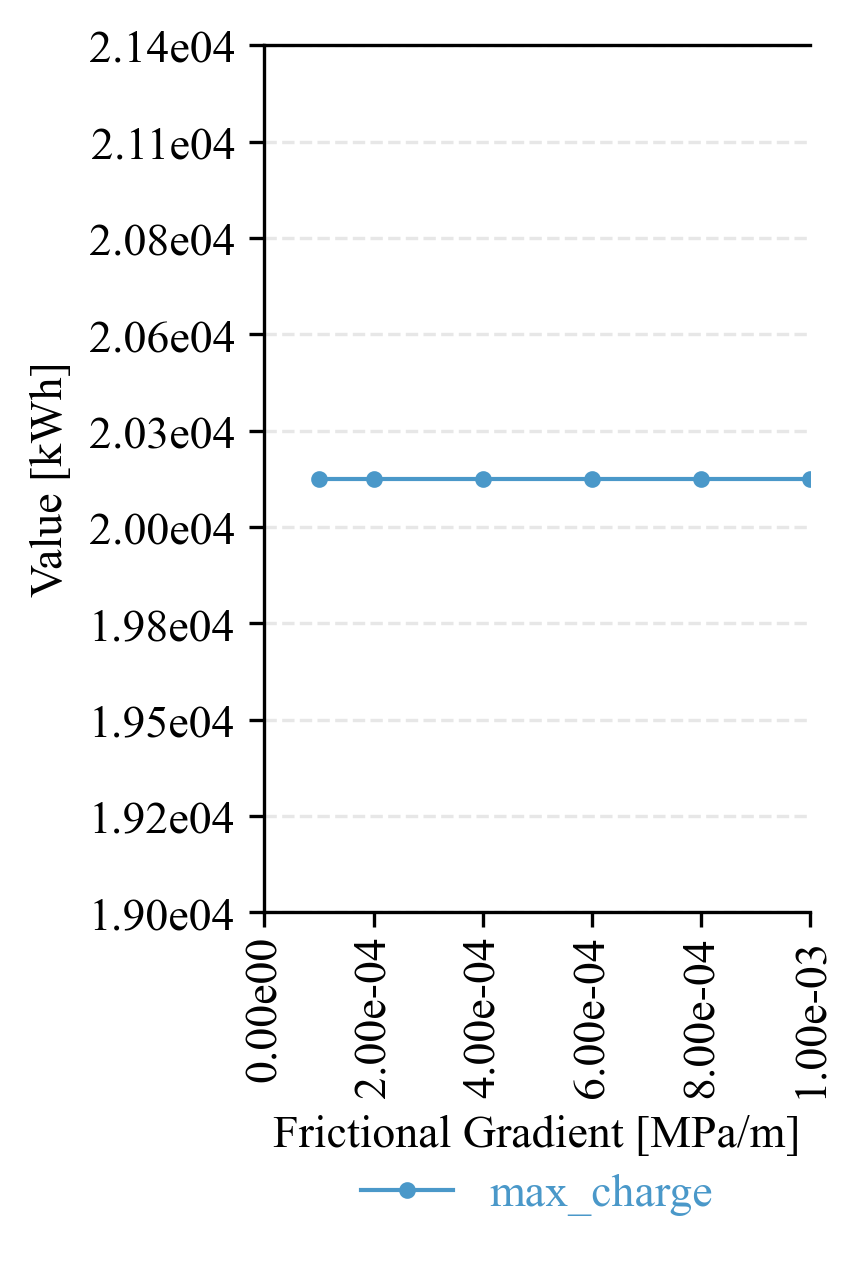

In [31]:
Figure_title = f'{Cycle_name} Maximum Discharge Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['max_charge'],
    left_label='Value',
    left_units='[kWh]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Maximum HS Store Brine Content Under Frictional Losses.png


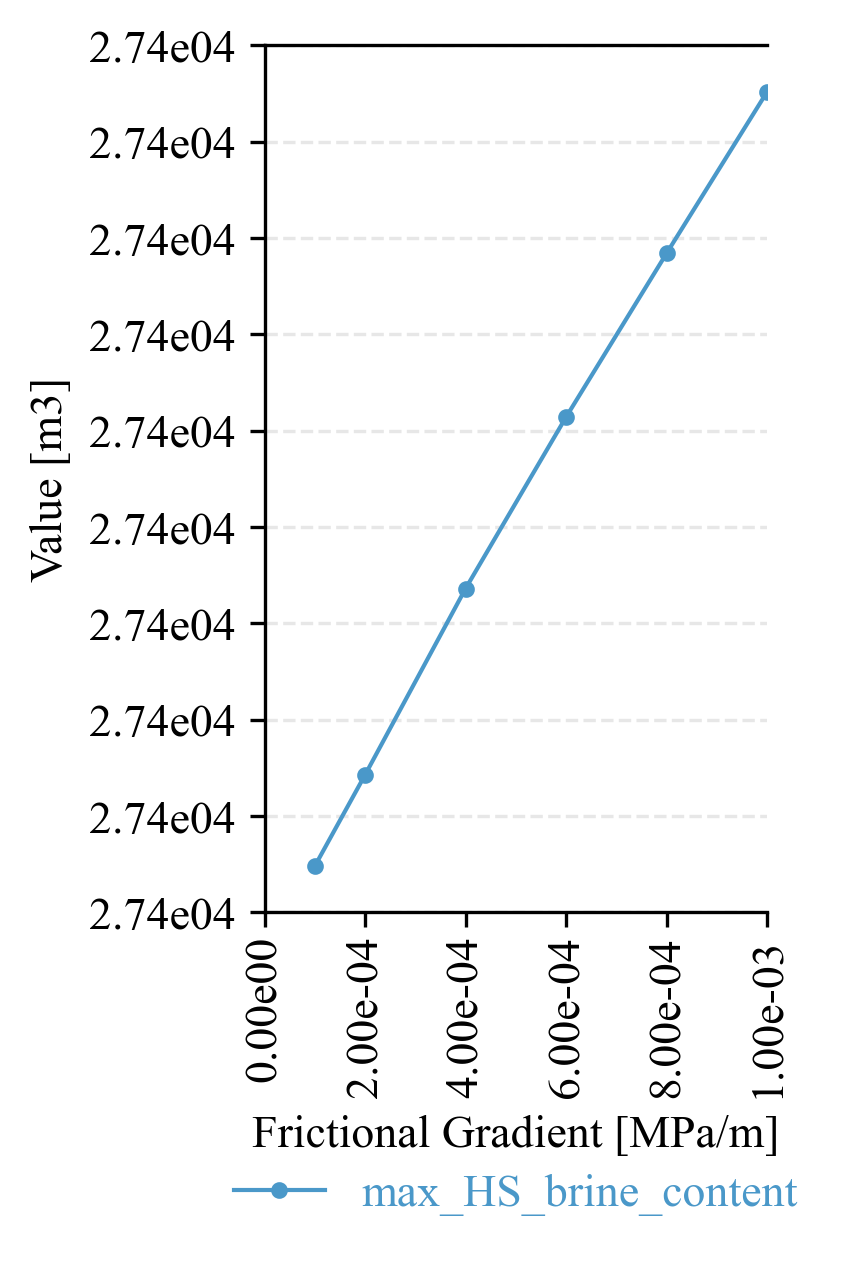

In [32]:
Figure_title = f'{Cycle_name} Maximum HS Store Brine Content Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['max_HS_brine_content'],
    left_label='Value',
    left_units='[m3]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

✔ Saved plot to C:\Users\Sunshine Tanphiphat\OneDrive\Desktop\Sunshine-Academics\Sunshine-Oxford\Oxford-EnergySystems-Dissertation\OXF-Dissertation-Simulation-CAES - Copy\CAESfricsensitivity\CAESfricsensitivity_figures\CAES Computer Simulation Runtime Under Frictional Losses.png


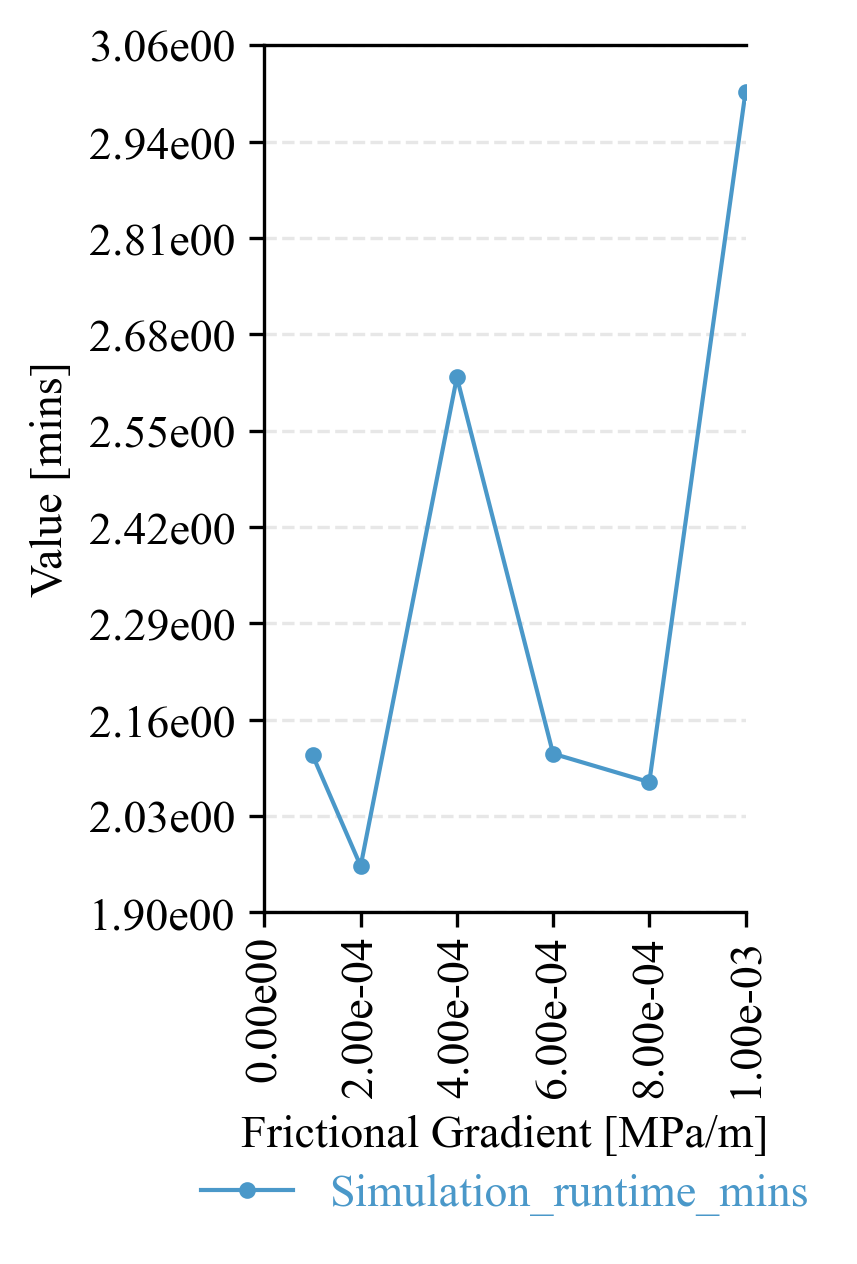

In [33]:
Figure_title = f'{Cycle_name} Computer Simulation Runtime Under Frictional Losses'

fig, ax = visualize_fric_sensitivity(
    dffricsensitivityCAES,
    title=Figure_title,
    series_left=['Simulation_runtime_mins'],
    left_label='Value',
    left_units='[mins]')

fig.tight_layout(); out_path = fig_dir / f"{Figure_title}.png"; fig.savefig(out_path, dpi=300, bbox_inches='tight'); print(f"✔ Saved plot to {out_path}")

In [34]:
dffricsensitivityCAES.columns

Index(['Exercise', 'Friction Gradient', 'W_C1', 'W_C2', 'W_C3', 'W_C4', 'W_C',
       'W_T1', 'W_T2', 'W_T3', 'W_T', 'Q_HE', 'Q_F', 'Q_ICL1', 'Q_ICL2',
       'Q_ICL3', 'Q_ICL', 'RTE_Liu', 'RTE_Gulen', 'RTE_alt_F', 'RTE_alt_HE',
       'PEE', 'ER', 'HR', 'EXDR_C', 'EXDR_T', 'EXDR_HS', 'EXDR_LS', 'EXDR_HE',
       'EXDR_HEX', 'EX_F_T', 'EX_P_T', 'EX_D_T', 'EX_EFF', 'P_HS_ss', 'T_HS',
       'p_HS_ss', 'V_HS_ss', 'deltaP_HS_fullcycle', 'E_V', 'p_HS_inj_avg',
       'vis_HS_inj_avg', 'HS_inj_drop', 'HS_inj_D0', 'max_purchase',
       'max_purchase_hr', 'min_purchase', 'min_purchase_hr', 'max_cashflow',
       'max_cashflow_hr', 'min_cashflow', 'min_cashflow_hr', 'max_balance',
       'max_balance_hr', 'min_balance', 'min_balance_hr', 'max_charge',
       'max_charge_hr', 'max_discharge', 'max_discharge_hr',
       'max_charge_mass_air', 'max_discharge_mass_air', 'max_P_HS_deviation',
       'max_P_HS_deviation_hr', 'most_frequent_constraint',
       'max_HS_brine_content', 'max_HS_brine_c